In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('fashion-mnist_train.csv')
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [28]:
df = df.dropna()
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,0,0,0,0,0,0,0,0,0,1,...,129.0,119.0,118.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0
1882,8,0,0,0,0,0,0,0,0,0,...,217.0,216.0,215.0,218.0,203.0,5.0,0.0,2.0,0.0,0.0
1883,6,0,0,0,0,0,0,0,0,0,...,71.0,62.0,64.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1884,4,0,0,0,0,0,0,0,0,2,...,6.0,0.0,55.0,210.0,210.0,133.0,0.0,0.0,0.0,0.0


In [4]:
X = df.drop(['label'],axis=1)
Y = df['label']

In [5]:
X = X.astype('float64')

In [6]:
# Min-max scaling
X_scaled = minmax_scale(X, feature_range = (0, 1))

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 65)

In [8]:
X_train.shape, Y_train.shape

((48000, 784), (48000,))

In [9]:
# Create an RBM model
rbm = BernoulliRBM(n_components = 300, learning_rate = 0.03, n_iter = 25, random_state = 65, verbose = 1)

In [10]:
classifier = LogisticRegression(max_iter = 600)

In [11]:
pipeline = Pipeline(steps = [('rbm', rbm), ('classifier', classifier)])

In [12]:
history = pipeline.fit(X_train, Y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -222.09, time = 28.01s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -212.59, time = 32.41s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -207.58, time = 28.90s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -204.19, time = 27.98s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -204.38, time = 26.43s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -203.88, time = 26.62s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -204.27, time = 26.26s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -204.07, time = 26.66s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -199.71, time = 26.17s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -199.85, time = 26.35s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -194.87, time = 23.32s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -197.46, time = 21.78s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -195.92, time = 21.78s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -196.70, time = 21.63s
[

C:\Users\91755\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
Y_pred = pipeline.predict(X_test)

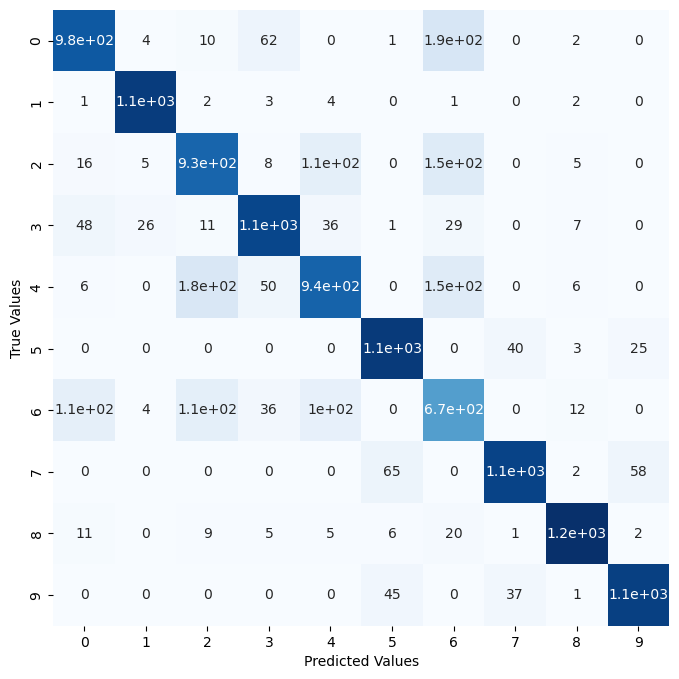

In [14]:
fig = plt.figure(figsize = (10, 8))

Y_predict = np.argmax(Y_pred, axis = 0) 
Y_testing = np.argmax(Y_test, axis = 0) 

mat = confusion_matrix(Y_test, Y_pred) 

# Plot Confusion matrix
sns.heatmap(mat.T, square = True, annot = True, cbar = False, cmap = plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [16]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1173
           1       0.99      0.97      0.98      1149
           2       0.76      0.74      0.75      1255
           3       0.87      0.87      0.87      1234
           4       0.71      0.79      0.74      1193
           5       0.94      0.90      0.92      1237
           6       0.65      0.56      0.60      1206
           7       0.90      0.93      0.91      1163
           8       0.95      0.97      0.96      1209
           9       0.93      0.93      0.93      1181

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000

